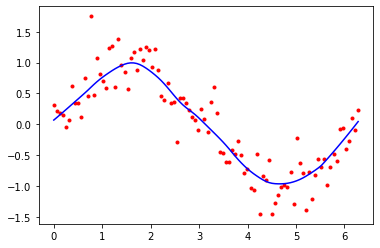

In [1]:
from math import ceil
import numpy as np
from scipy import linalg
def lowess(x, y, f, iterations):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],[np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest
import math
n = 100
x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
f =0.25
iterations=3
yest = lowess(x, y, f, iterations)
    
import matplotlib.pyplot as plt
plt.plot(x,y,"r.")
plt.plot(x,yest,"b-")

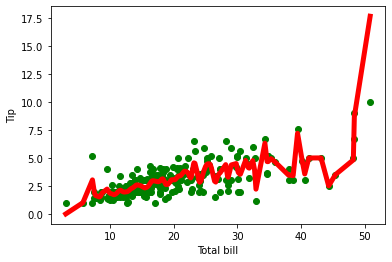

In [6]:
from numpy import *
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np1
import numpy.linalg as np
from scipy.stats.stats import pearsonr
 
def kernel(point,xmat, k):
    m,n = np1.shape(xmat)
    weights = np1.mat(np1.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2))
    return weights
 
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
     
def localWeightRegression(xmat,ymat,k):
    m,n = np1.shape(xmat)
    ypred = np1.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
       
# load data points
data = pd.read_csv('Datasets/tips.csv')
bill = np1.array(data.total_bill)
tip = np1.array(data.tip)
 
#preparing and add 1 in bill
mbill = np1.mat(bill)
mtip = np1.mat(tip) # mat is used to convert to n dimesiona to 2 dimensional array form
m= np1.shape(mbill)[1]
# print(m) 244 data is stored in m
one = np1.mat(np1.ones(m)) 
X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE
#print(X)
#set k here
ypred = localWeightRegression(X,mtip,0.3) 
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
     
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();